# Lyrics NLP Classification
### Attempting to identify the artist that sang the song based on the lyrics. 

In [1]:
import pandas as pd

# EDA

In [2]:
# Import dataset. Setting types now to avoid bugs later.
all_songs = pd.read_csv(filepath_or_buffer = 'spotify_millsongdata.csv',
                        dtype = {'artist': str, 'song': str, 'link':str, 'text':str})
all_songs

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [3]:
# Dropping links in the file, not using 'inplace' for this with ipynb in case rerunning cells over.
all_songs = all_songs.drop(axis=1, columns='link')
all_songs

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...


In [4]:
# Quick one-liner way to check data types. (objects are 'string' objects in python)
print(all_songs.info())

# Quick one-liner way to profile dataframe.
all_songs.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   text    57650 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB
None


,artist,song,text
count,57650,57650,57650
unique,643,44824,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,I just came back from a lovely trip along the ...
freq,191,35,6


In [5]:
# Get a random sample of 5 artists to use classfication model on. Setting seed to universe to maintain same sample when refreshing.
artist_sample = all_songs['artist'].sample(n = 5, random_state=42)
artist_sample

56679    Wishbone Ash
224         Aerosmith
32457    Fall Out Boy
9167     Janis Joplin
13270     Moody Blues
Name: artist, dtype: object

In [6]:
# Assign random;y sampled artists to list for use later in classification.
artists_to_classify = []

for artist in artist_sample:
    artists_to_classify.append(artist)

artists_to_classify

['Wishbone Ash', 'Aerosmith', 'Fall Out Boy', 'Janis Joplin', 'Moody Blues']

In [7]:
# Get subset of songs based on our artists we randomly selected.
songs_subset = all_songs[all_songs['artist'].isin(artists_to_classify)]
songs_subset

,artist,song,text
145,Aerosmith,All Your Love,All your love I miss lovin' \r\nAll your kiss...
146,Aerosmith,Bacon Biscuit Blues,"Put your biscuits in the oven \r\nHoney, put ..."
147,Aerosmith,Blind Man,I took a course in hallelujah \r\nI went to n...
148,Aerosmith,Draw The Line,"Checkmate honey, beat ya at your own damn game..."
149,Aerosmith,Eat The Rich,Well I woke up this morning \r\nOn the wrong ...
...,...,...,...
56675,Wishbone Ash,Queen Of Torture,Has anybody seen my baby kickin' around the to...
56676,Wishbone Ash,Rainstorm,"I'm amazed at the way you do, \r\nYou do the ..."
56677,Wishbone Ash,Renegade,"I can't tell you, mother, why I feel this way...."
56678,Wishbone Ash,Rest In Peace,Last night i had a dream \r\nA vision in the ...


In [8]:
# Checking dataset balance.
songs_subset['artist'].value_counts()

Moody Blues     174
Aerosmith       171
Janis Joplin    106
Wishbone Ash    102
Fall Out Boy     97
Name: artist, dtype: int64

In [9]:
# Randomly drop roughly 70 songs from Moodly Blues and Aerosmith from dataframe to balance out.
songs_subset = songs_subset.drop(songs_subset.query("artist == 'Moody Blues'").sample(frac=0.4).index)
songs_subset = songs_subset.drop(songs_subset.query("artist == 'Aerosmith'").sample(frac=0.4).index)

songs_subset['artist'].value_counts()


Janis Joplin    106
Moody Blues     104
Aerosmith       103
Wishbone Ash    102
Fall Out Boy     97
Name: artist, dtype: int64

### Profiling the lyrics of each artist to get rough idea of any outliers/repeats in specific words used (not necessary but curious).


In [10]:
# Adding all unique words in each artist's songs to their own lists.
joplin_lyrics = songs_subset[songs_subset['artist'] == 'Janis Joplin']['text'].values.tolist()
moody_lyrics = songs_subset[songs_subset['artist'] == 'Moody Blues']['text'].values.tolist()
aero_lyrics = songs_subset[songs_subset['artist'] == 'Aerosmith']['text'].values.tolist()
wishbone_lyrics = songs_subset[songs_subset['artist'] == 'Wishbone Ash']['text'].values.tolist()
fob_lyrics = songs_subset[songs_subset['artist'] == 'Fall Out Boy']['text'].values.tolist()

### Need to be careful after if using these for classification since I am not positive these are grouped as single songs, or parts of songs that were split up by breaks.

In [11]:
# Checking to see if lyrics were split up or not when assigned to list.
#songs_subset[songs_subset['artist'] == 'Janis Joplin'].values[0]

### Lyrics look to be split and joined by individual songs in list, so list ok for song-specific classification, but will verify other samples later.

### Need to extract specific words from objects in lyric lists, currently grouped by quotation marks. 

In [12]:
joplin_lyrics[0]

"A woman left lonely will soon grow tired of waiting,  \r\nShe'll do crazy things, yeah, on lonely occasions.  \r\nA simple conversation for the new men now and again  \r\nMakes a touchy situation when a good face come into your head.  \r\nAnd when she gets lonely, she's thinking 'bout her man,  \r\nShe knows he's taking her for granted, yeah yeah,  \r\nHoney, she doesn't understand, no no no no!  \r\n  \r\nWell, the fevers of the night, they burn an unloved woman  \r\nYeah, those red-hot flames try to push old love aside.  \r\nA woman left lonely, she's the victim of her man, yes she is.  \r\nWhen he can't keep up his own way, good Lord,  \r\nShe's got to do the best that she can, yeah!  \r\nA woman left lonely, Lord, that lonely girl,  \r\nLord, Lord, Lord!\r\n\r\n"

In [13]:
# Move to top for cleanup of NB. 
# Importing the stop words list to clean up the lyrics and get rid of words that lack meaning to song. Download of stop words required.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Assigning stop words as obj for use later.
stop_words = set(stopwords.words('english'))

""" Split, clean and append function for lists of lyrics. 
    1. Initial list of words that are split from the sentences in the lyrics of each song.
    2. Use the previous list to iterate over each word contained and drop non-alphanumeric characters.
    3. Changing all words to lowercase for use with the stop words that were downloaded. Stop words in nltk are all lowercase so need to match case.
    4. Check the cleaned word against the stop words list, and if it is not, append word to final words list.
"""
def split_append_words(lyrics: list):
    
    # Splitting each word from each indiv song, with all characters, and appending to new list.
    word_list = []
    for song in lyrics:
        for word in ''.join(song).split():
            word_list.append(word)

    # Cleaning each word from the list we pass, and appending to new final list.
    final_list = []
    for word in word_list:
        word_cleaned = ''.join(character for character in word if character.isalnum())
        
        # Changing words to lowercase and reassigning. Will most likely need to do this later anyways.
        word_cleaned = word_cleaned.lower()
        # Including the word in the final list if it is not a stop word (and, or, pronouns, etc). Also limiting size for now automatically, even if not in stop word list.
        if word_cleaned not in stop_words and len(word_cleaned) > 2:           
            final_list.append(word_cleaned)

    #return set(final_list)                 # Return a set from the final list in order to get unique list of words for later use. 
    return final_list                       # Returning list of all words for now for checking ferquency.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rboulet.TOTALSYSTECH\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Assigning lists of individual words to each artist using the split_append function we defined earlier. 
joplin_words = split_append_words(joplin_lyrics)
moody_words = split_append_words(moody_lyrics)
aero_words = split_append_words(aero_lyrics)
wishbone_words = split_append_words(wishbone_lyrics)
fob_words = split_append_words(fob_lyrics)

In [15]:
# Move to top for imports.
import numpy as np

# Get count of each word in artist's list.
def value_counts_df(artist_words: list):
    # Getting count of words in a series.
    word_counts_df = pd.value_counts(np.array(artist_words))

    # Converting the series of word counts to dataframe.
    word_counts_df = word_counts_df.to_frame()

    # Renaming the columns of dataframe, and assigning index (auto stored as strings instead of int) as a column.
    # Using .reset_index() instead of assigning the index to a new column since it uses positional 
    # refrence and can insert in beginning of dataframe (not necessary but organized.)
    word_counts_df.reset_index(level=0, inplace=True)
    word_counts_df.columns= ['word', 'word_count']

    return word_counts_df

In [16]:
# Assigning each artist's word counts using the previously defined function. Including artist column for ref later.
joplin_word_counts = value_counts_df(joplin_words).assign(artist = 'joplin')
moody_word_counts = value_counts_df(moody_words).assign(artist = 'moody')
aero_word_counts = value_counts_df(aero_words).assign(artist = 'aero')
wishbone_word_counts = value_counts_df(wishbone_words).assign(artist = 'wishbone')
fob_word_counts = value_counts_df(fob_words).assign(artist = 'fob')

#### Better practice would have been to clear out random characters prior to bouncing against stop words list, contractions are not being accounted for properly and not removed (isnt versus isn't)

### Plotting individual artists words to check frequency of each.

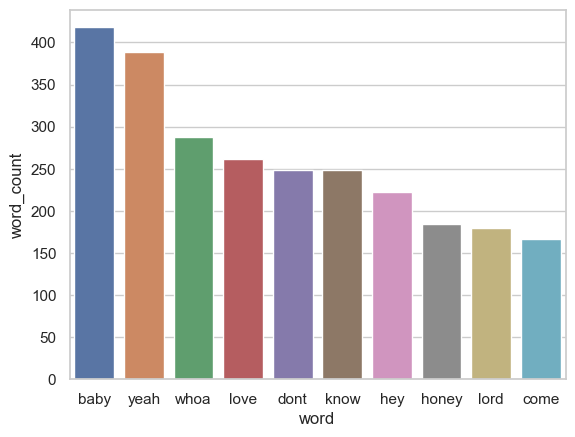

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plotting using seaborn since I have not used it a ton.
sns.barplot(data = joplin_word_counts.nlargest(10, 'word_count'),
            x = 'word',
            y = 'word_count')

# Seaborn uses matplotlib backend so have to call on object with .show() to display results.
plt.show()

#### The word 'honey' used a lot by Joplin. 'Love' appears to be used frequently by most artists.

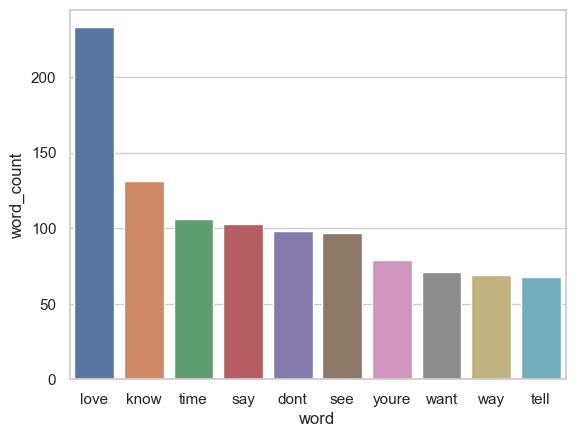

In [18]:
sns.barplot(data = moody_word_counts.nlargest(10, 'word_count'),
            x = 'word',
            y = 'word_count')

# Seaborn uses matplotlib backend so have to call on object with .show() to display results.
plt.show()

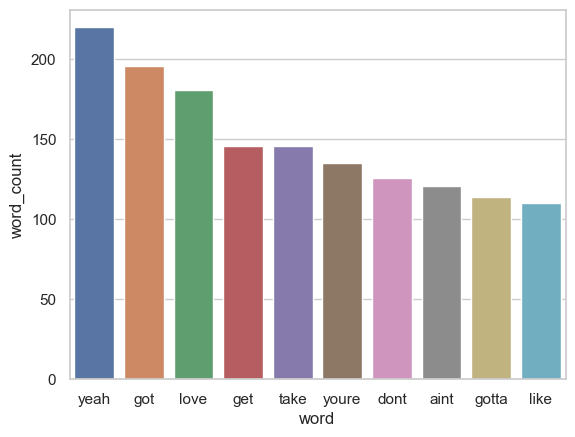

In [19]:
sns.barplot(data = aero_word_counts.nlargest(10, 'word_count'),
            x = 'word',
            y = 'word_count')

# Seaborn uses matplotlib backend so have to call on object with .show() to display results.
plt.show()

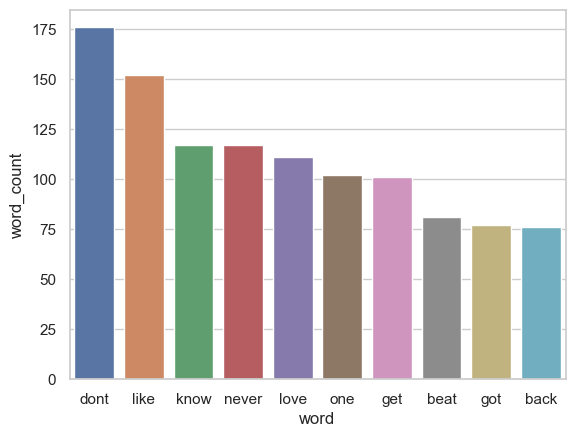

In [20]:
sns.barplot(data = fob_word_counts.nlargest(10, 'word_count'),
            x = 'word',
            y = 'word_count')

# Seaborn uses matplotlib backend so have to call on object with .show() to display results.
plt.show()

### 'Beat appearing a lot in FOB lyrics.

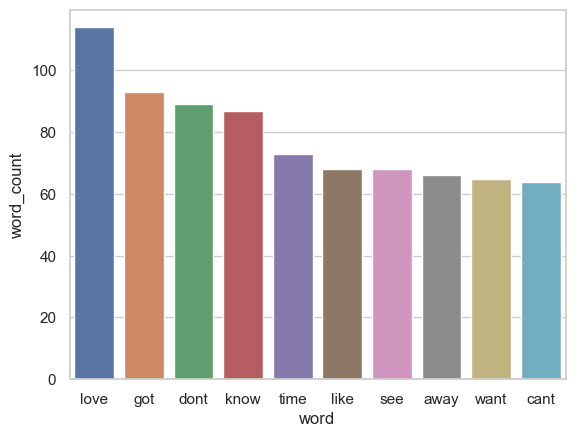

In [21]:
sns.barplot(data = wishbone_word_counts.nlargest(10, 'word_count'),
            x = 'word',
            y = 'word_count')

# Seaborn uses matplotlib backend so have to call on object with .show() to display results.
plt.show()

### Nothing very substantial standing out from each artist, many of the same words are used across lyrics. We will look across the each artist's unique words that they do NOT share in common. (Still in the EDA phase here, preprocessing later)

In [22]:
# Create full dataframe of the artist words.
all_artist_lists = [joplin_word_counts, moody_word_counts, aero_word_counts, wishbone_word_counts, fob_word_counts]
all_words_list = pd.concat(all_artist_lists, ignore_index=True)

all_words_list

,word,word_count,artist
0,baby,418,joplin
1,yeah,389,joplin
2,whoa,288,joplin
3,love,262,joplin
4,dont,248,joplin
...,...,...,...
9968,tact,1,fob
9969,realize,1,fob
9970,movies,1,fob
9971,excuse,1,fob


In [23]:
all_words_list[all_words_list['word'] == 'baby']

,word,word_count,artist
0,baby,418,joplin
1637,baby,60,moody
3302,baby,82,aero
5823,baby,31,wishbone
7609,baby,64,fob


### Cannot just take unique words from 'word' column since they are unique single value to each artist, but are common across multiple artists.
### Drop duplicates from 'word' column?

In [24]:
all_unique_words = all_words_list.drop_duplicates(subset = 'word', keep = False)

In [25]:
all_unique_words[all_unique_words['word'] == 'baby']

,word,word_count,artist


### Need to include 'keep' argument in the .drop_duplicates method to get rid of ALL duplicates and not keep 1st or last.

In [26]:
### Checking indiv artist nuique owrd values and counts.
all_unique_words[all_unique_words['artist'] == 'joplin'].nlargest(n = 20, columns = 'word_count')

,word,word_count,artist
85,diddley,29,joplin
112,hon,24,joplin
118,mary,22,joplin
133,jane,20,joplin
154,bobby,17,joplin
181,careless,14,joplin
218,francisco,12,joplin
242,wah,11,joplin
274,indeed,9,joplin
277,mcgee,9,joplin


### Findings a little more interesting looking at unique words across all artists, Joplin using 'diddley' 29 times in one or more songs, and 'hon' 24 times. Verify that 'Bobby' and Mcgee' are disproportional in her song.

In [27]:
all_unique_words[all_unique_words['artist'] == 'moody'].nlargest(n = 20, columns = 'word_count')

,word,word_count,artist
1704,22000,22,moody
1753,timothy,16,moody
1803,winters,12,moody
1806,leary,12,moody
1831,evening,11,moody
1839,finding,11,moody
1894,gently,8,moody
1923,turnaround,7,moody
1927,twilight,7,moody
1931,wildest,7,moody


### Probably need to get rid of numerics in text? Moody Blues using 'slings' 16 times across one or more songs.  

# Data Preprocessing

#### Working way up in complexity for each NLP model. Bag of words, n-grams, transformer are three I will look at for now.
#### Bag of words concerned with the frequency of vocabulary (indiv words) that occur in the artist's documents (indiv song lyrics/sentences) across all of the artists in our song corpus (collection of sentences). Order of the words and meaning are ignored.

### Going back to our original dataframe of all artists and their lyrics in sentence form to begin data preprocessing.

In [28]:
### Check original dataframe that was limited to our 5 artists. (semi-balances, good enough for our needs)
songs_subset.columns = ['artist', 'song', 'lyrics'] # changing lyrics column quickly.
songs_subset

,artist,song,lyrics
145,Aerosmith,All Your Love,All your love I miss lovin' \r\nAll your kiss...
149,Aerosmith,Eat The Rich,Well I woke up this morning \r\nOn the wrong ...
151,Aerosmith,Fever,I got a rip in my shoes \r\nAnd a hole in my ...
154,Aerosmith,I'm Ready,Well I'm ready. \r\nAs ready as anybody can b...
155,Aerosmith,Janie's Got A Gun,"Dum, dum, dum, honey what have you done \r\nD..."
...,...,...,...
56675,Wishbone Ash,Queen Of Torture,Has anybody seen my baby kickin' around the to...
56676,Wishbone Ash,Rainstorm,"I'm amazed at the way you do, \r\nYou do the ..."
56677,Wishbone Ash,Renegade,"I can't tell you, mother, why I feel this way...."
56678,Wishbone Ash,Rest In Peace,Last night i had a dream \r\nA vision in the ...


### Need to clean up the text like we did in EDA. Will double check rough preprocessing steps used prior and include new ones like:
#####    - Remove newline characters that is present in all of the lyrics.
#####    - Remove numerics. (may be unnecessary after step 1)
#####    - Convert to all lowercase characters.
#####    - Remove stop words (apostrophes a problem last time)
#####    - Remove all special characters left from removing digits etc.
#####    - Remove extra repeatred whitespace if any left.
#####    - Convert contractions to individual words.
#####    - Removing all special characters (post fixing contractions, some not accounted for properly with 'contractions' package).
#####    - Lemmatization (use the base words of various tenses like stopped/stopping = stop)
#####    - Check word length after others, but should be fine once prior steps taken?    

### 1. Removing new line characters / unnecessary characters.

In [29]:
# Reindexing our dataset to tidy up.
songs_subset = songs_subset.reset_index(drop = True)

In [30]:
# Example of lyrics in our dataset to test on, check for newline breaks.
test_lyrics = songs_subset
test_lyrics['lyrics'][0]

"All your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\nAll your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\n  \r\nEver since I left you baby, I never knew what I was missin'  \r\nAll your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\nAll your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\nEver since I left you baby, I never knew what I was missin'  \r\n  \r\nAll your lovin pretty baby  \r\nThat I had in store for you  \r\nAll your lovin pretty baby  \r\nThat I had in store for you-  \r\nWhat could a poor boy do?  \r\nAll your lovin pretty baby  \r\nAll your lovin pretty baby  \r\nAll your lovin pretty baby  \r\nWhat could a poor boy do?  \r\nAll your lovin pretty babay  \r\nAll your kissin is kissin  \r\nAll the lovin you gave me pretty babay  \r\nEver since I left you baby,  \r\nI never knew what I was missin' aaaah\r\n\r\n"

#### Aiming to shortcut any extra cleanup that might result from removing backslashes first by trying to remoce entire str of '\r\n' for newlines.

In [31]:
# PASS TO FINAL CLEANING FUNCTION
test_lyrics['lyrics'] = test_lyrics['lyrics'].str.replace('\r\n', '')

#### Looks to have cleaned up text properly for first instance, verifying with first 10 songs and then can use this method within function call.

In [32]:
for i in range (1,10):
    print(test_lyrics['lyrics'][i])

Well I woke up this morning  On the wrong side of the bed  And how I got to thinkin'  About all those things you said  About ordinary people  And how they make you sick  And if callin' names kicks back on you  Then I hope this does the trick  'cause I'm sick of your complainin'  About how many bills  And I'm sick of all your bitchin'  'Bout your poodles and your pills  And I just can't see no humor  About your way of life  And I think I can do more for you  With this here fork and knife  Eat the rich  There's only one thing that they are good for  Eat the rich  Take one bite now - come back for more  Eat the rich  I gotta get this off my chest  Eat the rich  Take one bite now - spit out the rest  So I called up my head shrinker  And I told him what I'd done  He said you best go on a diet  Yeah, I hope you have some fun  And a don't go burst the bubble  On rich folks who get rude  'Cause you won't get in no trouble  When you eats that kinda food  Now they're smokin' up their junk bonds 

#### Need to remove '[Chorus]' from multiple lyrics

### 2. Removing numbers from songs.

Need to find song lyrics with numbers in them and then test that removal is working properly.

In [33]:
# Useful tip found in pandas docs on using '\\d' for any digits contained.
# Do not need to explicitly set regex to True here.
test_lyrics[test_lyrics['lyrics'].str.contains('\\d', regex= True)].head(5)

,artist,song,lyrics
9,Aerosmith,Melt Down,The streets were cold and barren The nights w...
21,Aerosmith,Rocket 88,Yea I think I know I really hate it when it g...
35,Aerosmith,Temperature,My baby gimme high temperature. My baby gimme...
40,Aerosmith,The Reason A Dog,You keep knockin' but you can't come in The w...
54,Fall Out Boy,Our Lawyer Made Us Change The Name Of This Son...,Brothers and sisters put this record down Tak...


#### Will use one of these songs via the index to verify later on.

#### Removing any digits within the songs. Unclear if this will lead to commas popping up in random places yet, but will need to remove regardless.

In [34]:
# Using replace and regex of matching to any digits with the previous steps. 
test_lyrics['lyrics'] = test_lyrics['lyrics'].str.replace('\\d', '', regex = True)

#### Digits removed from one sample from our previous identification, will verify with others later, adn then include in overall function.

### 3. Convert all characters to lowercase. 

#### Should be straightforward using .lower()?

In [35]:
test_lyrics['lyrics'] = test_lyrics['lyrics'].str.lower()

#### Looks to work with sample, will confirm all later with raiseExceptions in function call. 

### 4. Removing stop words using the NLTK library. Lowercase is needed first based on EDA steps we performed.

In [36]:
# Dead code for imports so I dont forget to include at top level of final function.
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# Assigning stop words as obj for use later.
stop_words = set(stopwords.words('english'))

# List comprehension for use with Pandas dataframe columns comparing to stop_words list?? 
# Prior to using list comprehension need to have a list seperated, or use one as intermediary to list comprhension. 
# Using .split() and .join() to achieve same thing here, since the lyrics are one long str without seperators. 
test_lyrics['lyrics'] = test_lyrics['lyrics'].apply(lambda words: ' '.join([word for word in words.split() if word not in stop_words]))

#### Looks to have removed stopwords like 'i'. Will verify all later on in main clean function.

### Not clear on the contractions at this point and will wait until later on, but one article on Medium ' Dealing with contractions in NLP' -Lukei recommends the 'contractions' library.  

### 5. Removing special characters. 

#### Need to keep the apostrophes in the words that have contractions so I can use the contractions preprocessing package later on. For now we can get rid of commas etc.

In [37]:
# Goign to leave any matching apostrophes at end of text or on their own. Regex and replace to perform. 
test_lyrics['lyrics'] = test_lyrics['lyrics'].str.replace("'\B|[^a-z'? ]", ' ', regex = True)

#### Ran into some funky regex errors but working now, all special characters removed (this would also remove capitals in words but doesnt matter post .lower()) except for the words that have them inbetween characters aka contractions we want to keep for later. 

### 6. Removing extra spaces. 

#### Easiest method probably regex again. 

In [38]:
# Removing with regex for repeating whitespace. 
test_lyrics['lyrics'] = test_lyrics['lyrics'].replace(r'\s+', ' ', regex = True)

### 7. Convert contractions to individual words.

#### Will be using the 'contractions' library, pycontractions looked good too but maintenance score on Snyk.io is not as good.

In [39]:
# Import contractions library.test_lyrics
import contractions

# List the contractions .fix() function on the text to see if easy fix rather than lambda and list comprhension.
# test_lyrics['lyrics_contractions'] = contractions.fix(test_lyrics['lyrics'])

# Troubleshooting contractions errors.
# test_text = test_lyrics['lyrics'][2]
# contractions.fix(test_text)

# .Fix() working on samples of test data, possibly dataframe input as the issue? Update: Yes should have used .apply() for this instead of calling on entire dataframe column.
test_lyrics['lyrics'] = test_lyrics['lyrics'].apply(lambda words: contractions.fix(words))

#### Not sure if this truly fixed all contractions in there or not, samples look OK. UPDATE: Will now remove all special characters since contractions package missed some.

### 8. Remove remaining special characters (post contractions seperated, some apostrophes left)

In [40]:
# Using .replace() instead of regex to get rid of all leftover apostrophes (known case). 
test_lyrics['lyrics'] = test_lyrics['lyrics'].str.replace("'", "")

#### Apostrophes removed, samples look OK.

### 9. Lemmatization 

#### Will look into best library for this, some recommendations below:

 - WordNet
 - TextBlob
 - spaCy
 - TreeTagger
 - Pattern
 - Gensim
 - Stanford CoreNLP

In [41]:
for i in range(20,40):
    print('"'+ test_lyrics['lyrics'][i] + '"')

"goin under rats cellar goin under skins turnin yellow nose runny losin connection losin money getting affection new york city blues east side west side lose throw slam catch believe wearing tearing apart safe complaining because everythings rotten go insanin are not thing forgotten feelin cozy rats cellar cheeks rosy skins turning yellow loose soggy lookin mighty lazy super party pushin a daisies new york city schools east side west side lose throw slam catch believe wearing tearing apart"
"yea think know really hate gets slow got to try keep amused love way rocket purrs like best see blurs got to love watch light fuse lookin back yesterday got thing blow us away need navigate come ride rocket call chump change think because got sumpn one else got look like are not protege nuclear rocket well get darkside moon leave little somthin dune home ten going to wait because got rocket light years honey that is far we will go let us fire watch rockets glow gee suit g spot gee really must admit

#### Might want to remove repeated words in here?? This would impact BagofWords and may not help NGram either. 

#### Also may want to remove words less than 2 characters like we had in EDA. /

#### Still need to remove question marks in some lyrics.

### Need to move the step of stop words to post contraction cleaning when creating the main cleaning function.